In [42]:
#!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_train= pd.read_csv(r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main\dataset\Train.csv')
df_test= pd.read_csv(r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main\dataset\Test.csv')

In [45]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
#df_test

In [47]:
df_train.shape

(8523, 12)

In [48]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [51]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation

In [52]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [53]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [54]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [56]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [57]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [58]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [59]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [60]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements

In [61]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [62]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA with Dtale Library

In [63]:
import dtale

In [64]:
dtale.show(df_train)

# EDA using Pandas Profiling

In [65]:
from pandas_profiling import ProfileReport

In [66]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [67]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

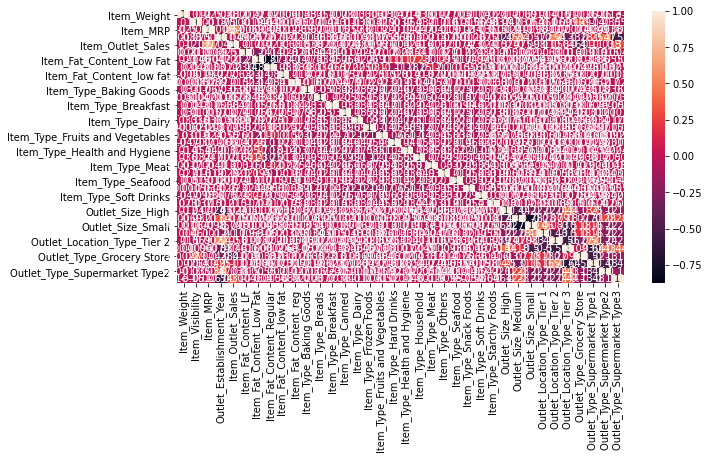

In [68]:

# Convert categorical variables to numeric ones
df_train = pd.get_dummies(df_train)

# Compute the correlation matrix for numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()


# EDA using Klib Library

In [69]:
import klib

In [70]:
def cat_plot(data, figsize=(15, 5), top=10, bottom=10, bar_color_top="#377eb8", bar_color_bottom="#e41a1c"):
    # ...

    value_counts_idx_top = value_counts_idx_top if isinstance(value_counts_idx_top, bool) else [elem[:20] for elem in value_counts_idx_top]
    value_counts_idx_bot = value_counts_idx_bot if isinstance(value_counts_idx_bot, bool) else [elem[:20] for elem in value_counts_idx_bot]

    # ...


In [71]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.00,-0.01,0.02,-0.01,0.01,-0.00,0.02,-0.02,-0.01,-0.00,-0.03,-0.05,-0.00,-0.03,0.03,0.00,0.03,-0.05,0.01,0.04,-0.00,0.03,-0.00,0.01,-0.05,0.02,0.01,-0.01,-0.00,0.00,-0.01,0.01,0.00,-0.00,0.00,-0.00
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13,0.00,-0.05,0.05,-0.00,0.00,0.02,0.00,0.04,0.01,0.04,-0.00,0.02,-0.00,-0.05,-0.03,-0.02,-0.02,0.01,0.01,-0.01,0.00,-0.04,-0.03,0.06,0.06,-0.07,0.01,0.29,-0.14,-0.03,-0.05
Item_MRP,0.02,-0.00,1.00,0.01,0.57,-0.01,-0.00,0.01,-0.01,-0.01,-0.07,-0.00,0.00,-0.01,0.04,-0.01,0.02,-0.01,-0.04,0.05,-0.00,-0.02,0.00,0.03,-0.04,0.01,0.00,-0.01,0.01,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05,0.00,0.00,-0.00,-0.03,0.02,-0.00,-0.00,-0.01,0.01,-0.01,0.01,-0.01,0.01,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.01,0.01,-0.45,0.34,-0.06,-0.20,0.54,-0.33,-0.28,0.25,0.47,-0.54
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,-0.01,-0.01,0.02,-0.01,-0.02,-0.04,0.00,-0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03,0.02,-0.00,-0.02,0.01,0.02,-0.02,0.02,0.02,0.08,-0.10,-0.11,0.06,0.05,-0.41,0.11,-0.04,0.31
Item_Fat_Content_LF,-0.00,0.00,-0.01,0.00,-0.01,1.00,-0.24,-0.14,-0.02,-0.02,-0.01,-0.00,-0.01,-0.02,-0.00,-0.02,-0.01,0.00,0.03,0.04,-0.02,0.02,0.01,-0.02,0.03,0.02,-0.01,-0.01,0.01,-0.01,-0.01,0.02,0.01,-0.02,0.02,0.00
Item_Fat_Content_Low Fat,0.02,-0.05,-0.00,0.00,-0.01,-0.24,1.00,-0.87,-0.14,-0.14,-0.08,-0.03,-0.06,-0.07,-0.02,-0.07,-0.11,0.11,0.17,0.23,-0.10,0.09,-0.02,-0.05,0.08,-0.03,-0.00,0.00,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.01,-0.00
Item_Fat_Content_Regular,-0.02,0.05,0.01,-0.00,0.02,-0.14,-0.87,1.00,-0.08,-0.08,0.08,0.03,0.07,0.07,0.02,0.08,0.11,-0.11,-0.18,-0.25,0.12,-0.10,0.02,0.06,-0.09,0.02,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01
Item_Fat_Content_low fat,-0.01,-0.00,-0.01,-0.03,-0.01,-0.02,-0.14,-0.08,1.00,-0.01,-0.00,0.02,-0.01,0.01,0.01,-0.02,-0.02,0.03,0.01,0.01,-0.02,-0.00,0.00,0.00,0.01,-0.01,0.02,-0.01,-0.01,-0.00,-0.00,0.01,0.01,-0.01,-0.01,0.01
Item_Fat_Content_reg,-0.00,0.00,-0.01,0.02,-0.02,-0.02,-0.14,-0.08,-0.01,1.00,0.02,-0.00,0.00,0.01,-0.01,0.02,0.02,-0.02,-0.03,-0.04,0.01,-0.02,-0.01,0.02,-0.02,0.04,0.00,0.01,-0.01,0.00,-0.00,0.00,-0.00,0.01,0.02,-0.02


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

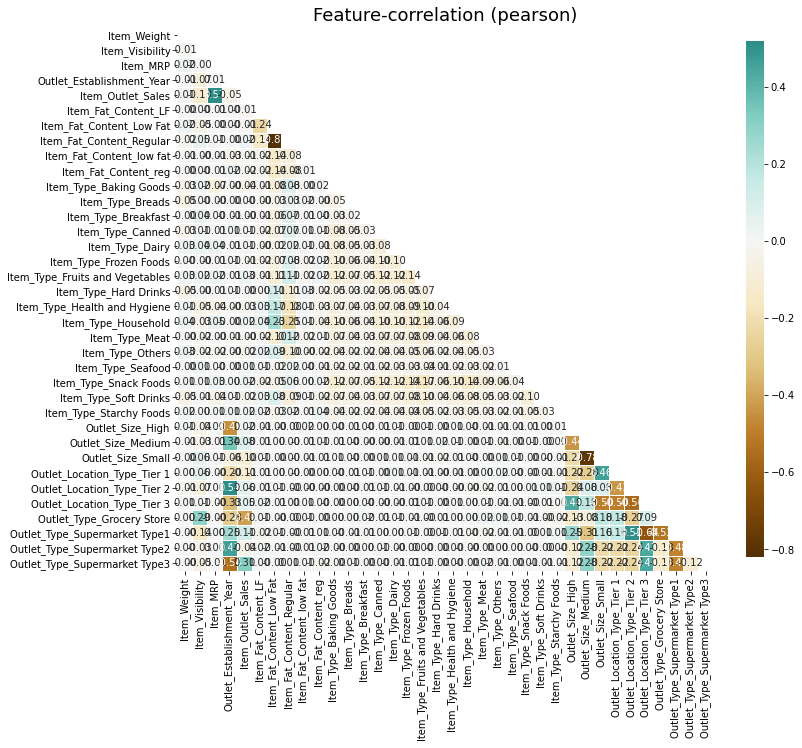

In [72]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

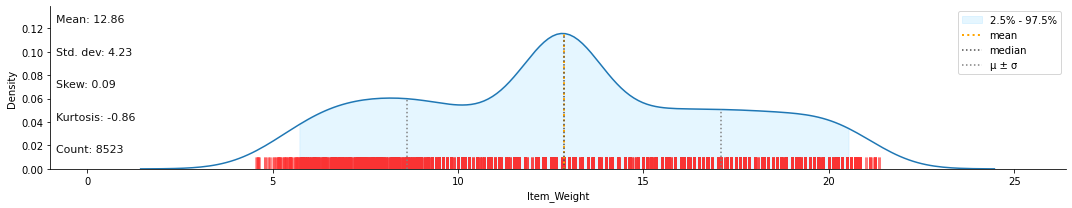

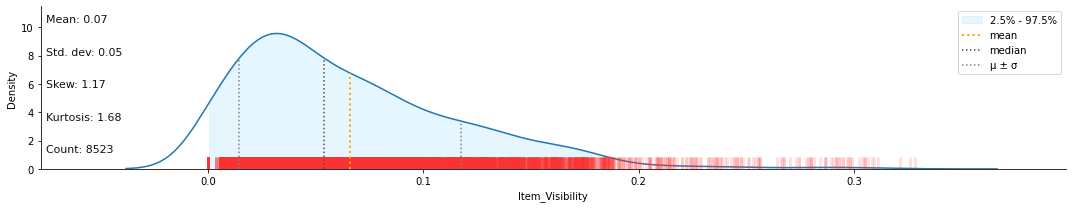

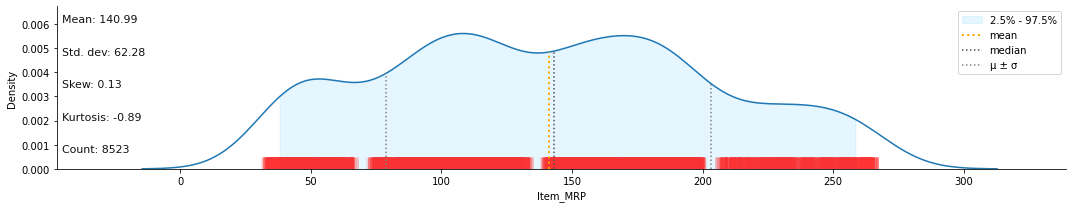

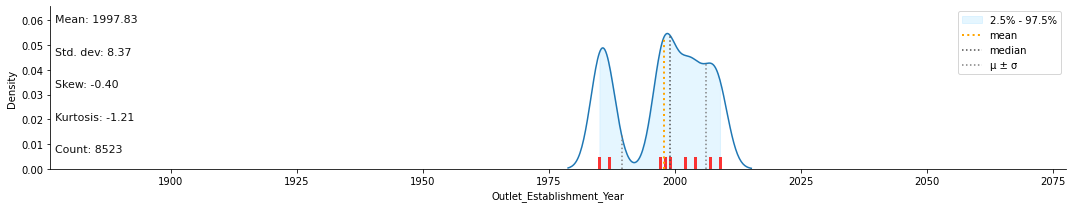

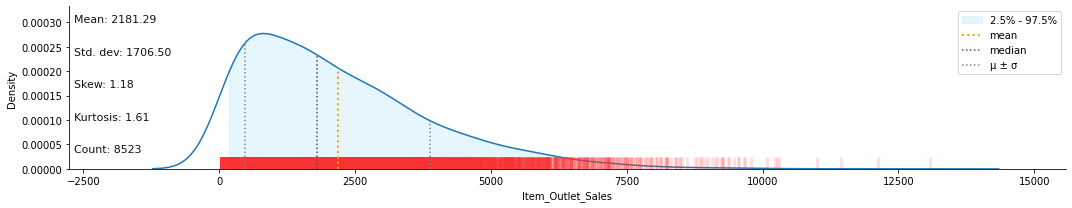

In [73]:
klib.dist_plot(df_train, kde_kws={'bw_adjust': 1.5})

In [74]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning using Klib Library

In [75]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Duplicate column names detected! Columns with index [8] and names ['item_fat_content_low_fat']) have been renamed to ['item_fat_content_low_fat_8'].
Long column names detected (>25 characters). Consider renaming the following columns ['item_fat_content_low_fat_8', 'item_type_fruits_and_vegetables', 'item_type_health_and_hygiene', 'outlet_location_type_tier_1', 'outlet_location_type_tier_2', 'outlet_location_type_tier_3', 'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2', 'outlet_type_supermarket_type3'].
Shape of cleaned data: (8523, 36) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: -0.07 MB (--12.07%)



,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,9.300000,0.016047,249.809204,1999,3735.137939,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920000,0.019278,48.269199,2009,443.422791,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500000,0.016760,141.617996,1999,2097.270020,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200001,0.000000,182.095001,1998,732.380005,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930000,0.000000,53.861401,1987,994.705200,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.521805,1987,2778.383301,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380000,0.046982,108.156998,2002,549.284973,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600000,0.035186,85.122398,2004,1193.113647,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210000,0.145221,103.133202,2009,1845.597656,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [76]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


Duplicate column names detected! Columns with index [8] and names ['item_fat_content_low_fat']) have been renamed to ['item_fat_content_low_fat_8'].
Long column names detected (>25 characters). Consider renaming the following columns ['item_fat_content_low_fat_8', 'item_type_fruits_and_vegetables', 'item_type_health_and_hygiene', 'outlet_location_type_tier_1', 'outlet_location_type_tier_2', 'outlet_location_type_tier_3', 'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2', 'outlet_type_supermarket_type3'].


,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,9.300,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   item_weight                      8523 non-null   float64
 1   item_visibility                  8523 non-null   float64
 2   item_mrp                         8523 non-null   float64
 3   outlet_establishment_year        8523 non-null   int64  
 4   item_outlet_sales                8523 non-null   float64
 5   item_fat_content_lf              8523 non-null   bool   
 6   item_fat_content_low_fat         8523 non-null   bool   
 7   item_fat_content_regular         8523 non-null   bool   
 8   item_fat_content_low_fat_8       8523 non-null   bool   
 9   item_fat_content_reg             8523 non-null   bool   
 10  item_type_baking_goods           8523 non-null   bool   
 11  item_type_breads                 8523 non-null   bool   
 12  item_type_breakfast 

In [78]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   item_weight                      8523 non-null   float32
 1   item_visibility                  8523 non-null   float32
 2   item_mrp                         8523 non-null   float32
 3   outlet_establishment_year        8523 non-null   int16  
 4   item_outlet_sales                8523 non-null   float32
 5   item_fat_content_lf              8523 non-null   boolean
 6   item_fat_content_low_fat         8523 non-null   boolean
 7   item_fat_content_regular         8523 non-null   boolean
 8   item_fat_content_low_fat_8       8523 non-null   boolean
 9   item_fat_content_reg             8523 non-null   boolean
 10  item_type_baking_goods           8523 non-null   boolean
 11  item_type_breads                 8523 non-null   boolean
 12  item_type_breakfast 

In [79]:
klib.mv_col_handling(df_train)

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,9.300000,0.016047,249.809204,1999,3735.137939,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920000,0.019278,48.269199,2009,443.422791,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500000,0.016760,141.617996,1999,2097.270020,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200001,0.000000,182.095001,1998,732.380005,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930000,0.000000,53.861401,1987,994.705200,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.521805,1987,2778.383301,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380000,0.046982,108.156998,2002,549.284973,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600000,0.035186,85.122398,2004,1193.113647,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210000,0.145221,103.133202,2009,1845.597656,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [80]:
df_train

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,9.300000,0.016047,249.809204,1999,3735.137939,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920000,0.019278,48.269199,2009,443.422791,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500000,0.016760,141.617996,1999,2097.270020,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200001,0.000000,182.095001,1998,732.380005,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930000,0.000000,53.861401,1987,994.705200,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.521805,1987,2778.383301,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380000,0.046982,108.156998,2002,549.284973,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600000,0.035186,85.122398,2004,1193.113647,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210000,0.145221,103.133202,2009,1845.597656,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


# Preprocessing Task before Model Building

## 1) Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content_lf'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size_high'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type_tier_1'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type_grocery_store'])


In [88]:
df_train

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,...,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3,item_fat_content,outlet_size,outlet_location_type,outlet_type
0,9.300000,0.016047,249.809204,1999,3735.137939,False,True,False,False,False,...,False,False,False,True,False,False,0,0,1,0
1,5.920000,0.019278,48.269199,2009,443.422791,False,False,True,False,False,...,False,True,False,False,True,False,0,0,0,0
2,17.500000,0.016760,141.617996,1999,2097.270020,False,True,False,False,False,...,False,False,False,True,False,False,0,0,1,0
3,19.200001,0.000000,182.095001,1998,732.380005,False,False,True,False,False,...,False,True,True,False,False,False,0,0,0,1
4,8.930000,0.000000,53.861401,1987,994.705200,False,True,False,False,False,...,False,True,False,True,False,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.521805,1987,2778.383301,False,True,False,False,False,...,False,True,False,True,False,False,0,1,0,0
8519,8.380000,0.046982,108.156998,2002,549.284973,False,False,True,False,False,...,True,False,False,True,False,False,0,0,0,0
8520,10.600000,0.035186,85.122398,2004,1193.113647,False,True,False,False,False,...,True,False,False,True,False,False,0,0,0,0
8521,7.210000,0.145221,103.133202,2009,1845.597656,False,False,True,False,False,...,False,True,False,False,True,False,0,0,0,0


# 2) Splitting our data into train and test

In [89]:
X=df_train.drop('item_outlet_sales',axis=1)

In [90]:
Y=df_train['item_outlet_sales']

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3) Standarization 

In [92]:
X.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,0.066132,140.992767,1997.831867,0.037076,0.109351,0.280183,0.127068
std,4.226124,0.051598,62.275066,8.371760,0.188960,0.312098,0.449115,0.333069
min,4.555000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012802,1999.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.328391,266.888397,2009.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [94]:
X_train_std= sc.fit_transform(X_train)

In [95]:
X_test_std= sc.transform(X_test)

In [96]:
X_train_std

array([[ 1.52290023,  0.68469731, -1.38572404, ...,  2.87245847,
        -0.62700435, -0.38093638],
       [-1.239856  , -0.09514746, -0.74452002, ..., -0.34813384,
        -0.62700435, -0.38093638],
       [ 1.54667619, -0.0083859 ,  0.41817991, ..., -0.34813384,
        -0.62700435, -0.38093638],
       ...,
       [-0.08197109, -0.91916229, -0.71089641, ..., -0.34813384,
         1.59488528, -0.38093638],
       [-0.74888436,  1.21363045,  1.37897139, ..., -0.34813384,
        -0.62700435, -0.38093638],
       [ 0.67885675,  1.83915361, -1.33980865, ..., -0.34813384,
        -0.62700435, -0.38093638]])

In [97]:
X_test_std

array([[-0.43860916, -0.21609253, -0.65315472, ..., -0.34813384,
        -0.62700435, -0.38093638],
       [ 1.22570184, -0.52943464,  0.12220324, ...,  2.87245847,
        -0.62700435, -0.38093638],
       [-1.2184578 ,  0.16277341, -1.01810871, ..., -0.34813384,
         1.59488528, -0.38093638],
       ...,
       [ 0.65508101,  0.8782423 ,  0.70245536, ..., -0.34813384,
        -0.62700435,  2.62511023],
       [ 1.01171909, -1.28409256, -0.4228202 , ..., -0.34813384,
        -0.62700435, -0.38093638],
       [-1.56558541, -1.09265374,  0.15582685, ..., -0.34813384,
        -0.62700435, -0.38093638]])

In [98]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [99]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [100]:
import joblib

In [101]:
joblib.dump(sc,r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main\models\sc.sav')

['C:\\Users\\MOHAMMED ARBAZ\\Documents\\BigMart-Sales-Prediction-With-Deployment-main\\models\\sc.sav']

# Model Building

In [102]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [103]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [104]:
X_test.head()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat_8,item_fat_content_reg,item_type_baking_goods,...,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3,item_fat_content,outlet_size,outlet_location_type,outlet_type
8179,11.000000,0.055163,100.335800,2009,False,True,False,False,False,False,...,False,True,False,False,True,False,0,0,0,0
8355,18.000000,0.038979,148.641800,1987,False,True,False,False,False,False,...,False,True,False,True,False,False,0,1,0,0
3411,7.720000,0.074731,77.598602,1997,False,False,True,False,False,False,...,False,False,False,True,False,False,0,0,1,0
7089,20.700001,0.049035,39.950600,2007,False,True,False,False,False,False,...,True,False,False,True,False,False,0,0,0,0
6954,7.550000,0.027225,152.934006,2002,False,True,False,False,False,False,...,True,False,False,True,False,False,0,0,0,0


In [105]:
Y_pred_lr=lr.predict(X_test_std)

In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [107]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.5577985974731761
824.5044679848941
1097.7978442138005


In [108]:
joblib.dump(lr,r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main\models\lr.sav')

['C:\\Users\\MOHAMMED ARBAZ\\Documents\\BigMart-Sales-Prediction-With-Deployment-main\\models\\lr.sav']

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [110]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [111]:
Y_pred_rf= rf.predict(X_test_std)

In [112]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))


0.5493328149230543
779.7727506565127
1108.2564919498186


# Hyper Parameter Tuning

In [113]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.548 using {'n_estimators': 1000}
0.499 (0.012) with: {'n_estimators': 10}
0.544 (0.006) with: {'n_estimators': 100}
0.548 (0.007) with: {'n_estimators': 1000}


In [114]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [115]:
grid_search_forest.best_score_

0.5479371146744061

In [116]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [117]:
r2_score(Y_test,Y_pred_rf_grid)

0.5516826033050868

# Save your model

In [118]:
import joblib

In [119]:
joblib.dump(grid_search_forest,r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main.sav')

['C:\\Users\\MOHAMMED ARBAZ\\Documents\\BigMart-Sales-Prediction-With-Deployment-main.sav']

In [120]:
model=joblib.load(r'C:\Users\MOHAMMED ARBAZ\Documents\BigMart-Sales-Prediction-With-Deployment-main\models.sav')